In [1]:
#Import Needed Packages
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
from scipy.stats import skew
import scipy.stats as ss
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy import stats
import scipy.stats as st
from statsmodels.stats.power import TTestIndPower



#### Project Part 1

In [2]:
#Import Boston data, covert to dataframe, and add column names.
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
#Adding MEDV to dataframe
bos['MEDV']=boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
#Chose % Lower Status of the Population as variable, starting assignment by calculating the mean..
bos['LSTAT'].mean()

12.653063241106723

In [6]:
#... and now the standard deviation
bos['LSTAT'].std()

7.141061511348571

Text(0.5, 1.0, 'LSTAT Histogram for Boston')

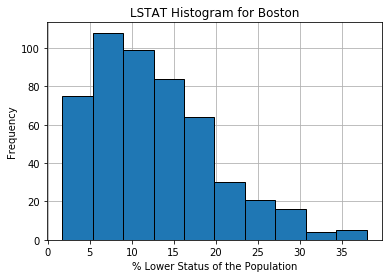

In [7]:
#Plotting Histogram of Variable
plt.hist(bos['LSTAT'], zorder=2, edgecolor= 'black')
plt.grid()
plt.ylabel('Frequency')
plt.xlabel('% Lower Status of the Population')
plt.title('LSTAT Histogram for Boston')

In [8]:
#Checking skew, High Skew > 0.80
#High skew means that the median should be taken into consideration in addition to the mean.
skew(bos['LSTAT'])

0.9037707431346133

Text(0.5, 1.0, '% Lower Status of the Population VS Median House Value')

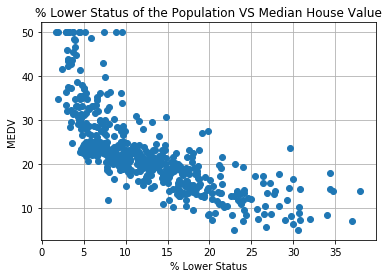

In [9]:
#Visualising relationship between chosen variable and MEDV
plt.scatter(bos['LSTAT'],bos['MEDV'], zorder=2)
plt.grid()
plt.xlabel('% Lower Status')
plt.ylabel('MEDV')
plt.title('% Lower Status of the Population VS Median House Value')

In [10]:
#Checking correlation between LSTAT and MEDV
bos[['LSTAT','MEDV']].corr()

,LSTAT,MEDV
LSTAT,1.000000,-0.737663
MEDV,-0.737663,1.000000


In [11]:
#Creating test train split, 80% Training/20% Test
X = bos['LSTAT'].values.reshape(-1,1)
y = bos['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

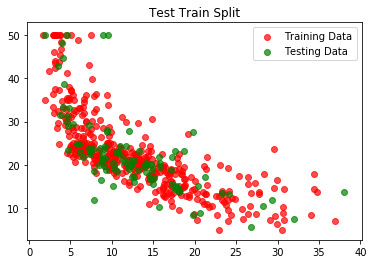

In [12]:
#Visualizing test train split
plt.scatter(X_train, y_train, label='Training Data', color='r', alpha=.7)
plt.scatter(X_test, y_test, label='Testing Data', color='g', alpha=.7)
plt.legend()
plt.title('Test Train Split')
plt.show()

In [13]:
#Create linear model and reshaping X_train
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

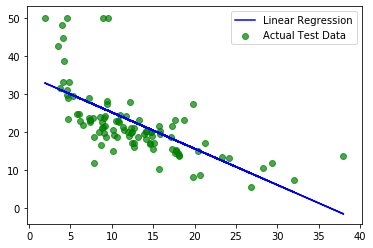

In [14]:
#Using model to predict test data
prediction = lr.predict(X_test)

#Plot prediction line against actual test data
plt.plot(X_test, prediction, label='Linear Regression', color='b')
plt.scatter(X_test, y_test, label='Actual Test Data', color='g', alpha=.7)
plt.legend()
plt.show()

In [15]:
#SKLearn score of .544 means that the linear regression model is moderately accurate.
#Due to the shape of the correlation it is likely an expoential regression would have been more accurate.
lr.score(X, y)

0.5439214616845225

#### Project Part 2

Theory is that houses along the Charles River have a higher MEDV. Null hyptotheis states that observations of higher prices are likely just due to chance.


In [17]:
#Calculating P-Value with MEDV Mean as estimate of Population Mean
#Step 1 create 2 different dataframes.
nonchas = bos[bos.CHAS == 0]
chas = bos[bos.CHAS == 1]
MEDVnc = nonchas['MEDV']
MEDVc = chas['MEDV']

In [18]:
#Checking non-Chas
nonchas.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [19]:
#Verifying correct transfer of MEDV data.
MEDVnc.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [20]:
#Step 2 Calculate P-Value Using SKLearn Two Sample T-Test
t, p = ttest_ind(MEDVc, MEDVnc, equal_var=False)
print("ttest_ind: t = %g  p = %g" % (t, p))

ttest_ind: t = 3.11329  p = 0.00356717


In [21]:
#Being that the p value of the two sample t-test is 0.0036 and p value < .05 we can reject the null hypothesis
#and state that differences in MEDV related to being on the Charles River is not due to chance or sample size.
#P value was verified using online two sample t test calculator using the following values:
print('Sample 1 Mean :', MEDVnc.mean())
print('Sample 2 Mean :', MEDVc.mean())
print('Sample 1 Standard Deviation :', MEDVnc.std())
print('Sample 2 Standard Deviation :', MEDVc.std())
print('Sample 1 Size :', len(MEDVnc))
print('Sample 1 Size :', len(MEDVc))

Sample 1 Mean : 22.093842887473482
Sample 2 Mean : 28.44
Sample 1 Standard Deviation : 8.831362409577903
Sample 2 Standard Deviation : 11.816643297634458
Sample 1 Size : 471
Sample 1 Size : 35


In [22]:
#Creating confidence interval of 90% for MEDV for houses on the Charles River
st.t.interval(alpha=0.9, df=len(MEDVc)-1, loc = MEDVc.mean(), scale= st.sem(MEDVc))

(25.062586315862976, 31.817413667029342)

In [23]:
#Finding group size to satisfy 80% power with an effect size of 0.6.
effect_size = 0.6
alpha = .10 #matching 90% confidence level from previous question
power = 0.8

power_calc = TTestIndPower()
sample = power_calc.solve_power(effect_size = effect_size,
                                   power = power,
                                   alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample))

Required sample size: 35.04


#### Part 3: Creating New Features to Introduce to Census Track.

The features that I would try to introduce would be access to subsidized home improvement grants for tracts
on and around the Charles River. It is known that the ability to make improvements on a home increases the MEDV of that
home. In order to measure the effectiveness of this program. I would conduct an analysis on the MEDV of homes that have
accepted the subsidy and use a heat map to highlight the change in MEDV in the areas that the subsidy is
offered. 

I would strive for a group power of at least 80%. It would be important to have a p-value less than 5% which would 
indicate statistical significance and dismiss the posibility of changes in MEDV being due to random chance.

I would try to implement a sample size that would accomodate the above mentioned group power and p value for
testing of the above hypothesis which is 35.